In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fd49f933475446a2b4f3b1495ae5fd67 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FlE2tIowV4IR_Ma3XvugjQO_Tk6NxuR0WwYtD8D8MBk0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_fd49f933475446a2b4f3b1495ae5fd67.get_object(Bucket='drugclassification-donotdelete-pr-t2tz5kjrdd29i1',Key='drug200.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Read The Dataset

In [2]:
# Reading the csv data 

In [3]:
#df = pd.read_csv(r"C:\Users\arepa\Downloads\archive\drug200.csv")


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Univariate Analysis

In [5]:
# Checking the distribution (normal or skewed)

In [6]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

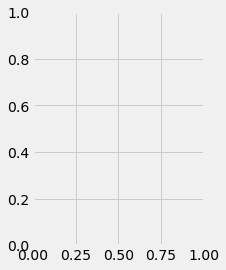

In [7]:
plt.subplot(121)

<AxesSubplot:xlabel='Age', ylabel='Density'>

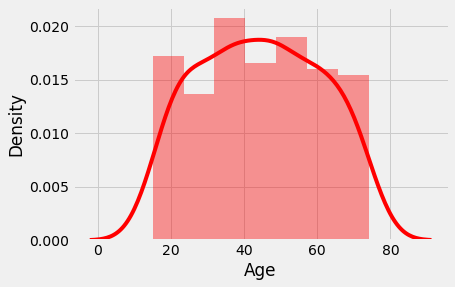

In [8]:
sns.distplot(df['Age'],color='r')

<AxesSubplot:>

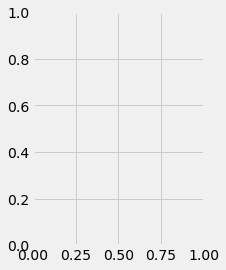

In [9]:
plt.subplot(122)

<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

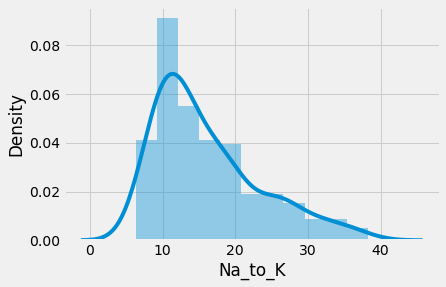

In [10]:
sns.distplot(df['Na_to_K'])

In [11]:
plt.show()

In [12]:
# Creating a data frame with categorical fed

In [13]:
df_cat = df.select_dtypes(include='object')

In [14]:
df_cat.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY


In [15]:
# Visualizing the count of categorical variable.

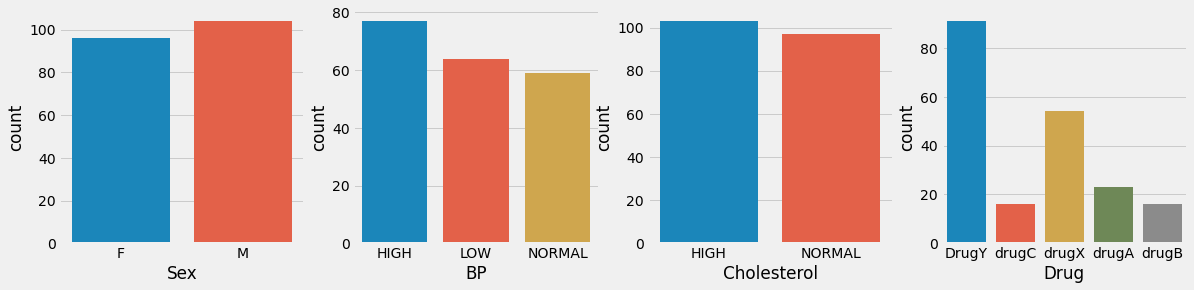

In [16]:
plt.figure(figsize=(18,4))
for i,j in enumerate(df_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(df[j])

# Bivariate Analysis

In [17]:
# Visualizing the relation between drug, BP, sex & cholesterol

In [18]:
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

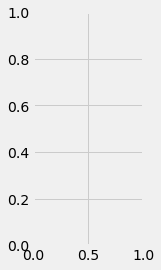

In [19]:
plt.subplot(131)

<AxesSubplot:xlabel='Drug', ylabel='count'>

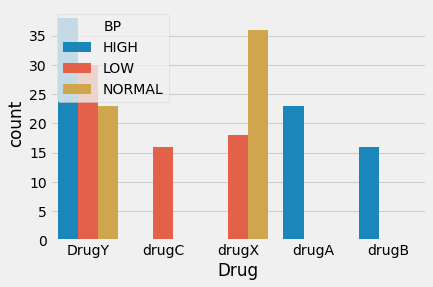

In [20]:
sns.countplot(df['Drug'],hue=df['BP'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


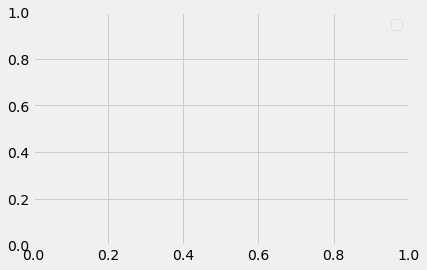

In [21]:
plt.legend(loc='upper right')

<AxesSubplot:>

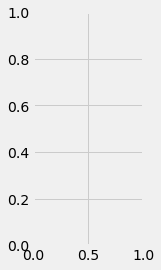

In [22]:
plt.subplot(132)

<AxesSubplot:xlabel='Drug', ylabel='count'>

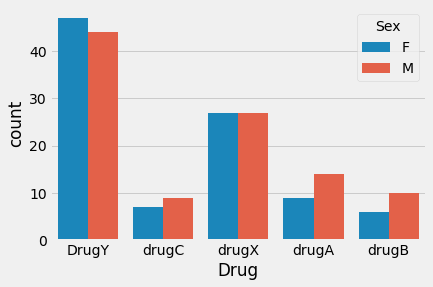

In [23]:
sns.countplot(df['Drug'],hue=df['Sex'])

<AxesSubplot:>

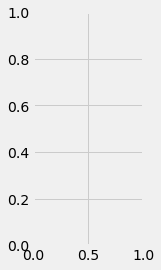

In [24]:
plt.subplot(133)

<AxesSubplot:xlabel='Drug', ylabel='count'>

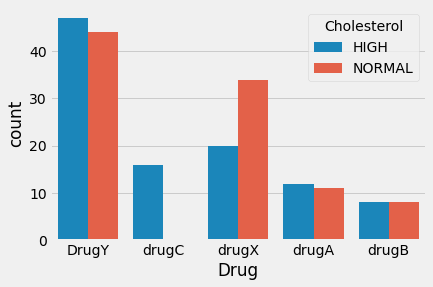

In [25]:
sns.countplot(df['Drug'],hue=df['Cholesterol'])

In [26]:
bins=[15,30,50,75]
labels=[15-30,30-50,50-75]
df['Age_'] = pd.cut(df['Age'],bins=bins,
labels=labels,right=False)

In [27]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_
0,23,F,HIGH,HIGH,25.355,DrugY,-15
1,47,M,LOW,HIGH,13.093,drugC,-20
2,47,M,LOW,HIGH,10.114,drugC,-20
3,28,F,NORMAL,HIGH,7.798,drugX,-15
4,61,F,LOW,HIGH,18.043,DrugY,-25


In [28]:
df['Age_'].value_counts()

-25    78
-20    75
-15    47
Name: Age_, dtype: int64

In [29]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64>

In [30]:
df['Age'].min()

15

In [31]:
df['Age'].max()

74

In [32]:
# Finding the relation between categorized age and drug

In [33]:
pd.crosstab(df['Age_'],[df['Drug']])

Drug,DrugY,drugA,drugB,drugC,drugX
Age_,,,,,
-15,24,6,0,5,12
-20,31,16,0,7,21
-25,36,1,16,4,21


# Multivariate Analysis

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

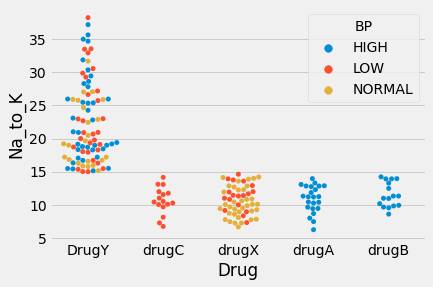

In [34]:
sns.swarmplot(df['Drug'],df['Na_to_K'],hue=df['BP'])

# Descriptive Analysis


In [35]:
# DrugC is used for low BP patient, DrugY is used on patient, DrugAB is used for high BP patient

In [36]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_
count,200.000000,200,200,200,200.000000,200,200.0
unique,NaN,2,3,2,NaN,5,3.0
top,NaN,M,HIGH,HIGH,NaN,DrugY,-25.0
freq,NaN,104,77,103,NaN,91,78.0
mean,44.315000,NaN,NaN,NaN,16.084485,NaN,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN,NaN


# Checking For Null Values


In [37]:
# Shape of csv data
df.shape

(200, 7)

In [38]:
# Checking the information of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    object  
 3   Cholesterol  200 non-null    object  
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
 6   Age_         200 non-null    category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [39]:
# Finding null value

In [40]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Age_           0
dtype: int64

# Handling Outliers


In [41]:
# Finding outliers 

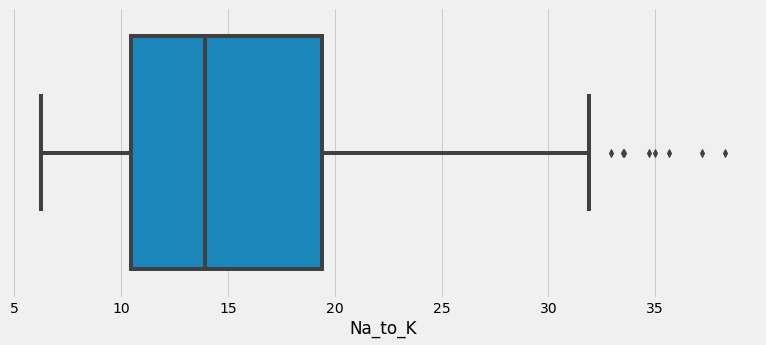

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(df['Na_to_K'])
plt.show()

In [43]:
# Na_to_K has 8 outliers. In this project we are not going 

In [44]:
q1 = np.quantile(df['Na_to_K'],0.25)
q3 = np.quantile(df['Na_to_K'],0.75)

In [45]:
IQR = q3-q1

In [46]:
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

In [47]:
print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['Na_to_K']>upper_bound]))
print('Skewed data :',len(df[df['Na_to_K']<lower_bound]))

q1 : 10.4455
q3 : 19.38
IQR : 8.9345
Upper Bound : 32.78175
Lower Bound : -2.9562500000000007
Skewed data : 8
Skewed data : 0


In [48]:
# To handle outliers transformation techniques are used.

In [49]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)


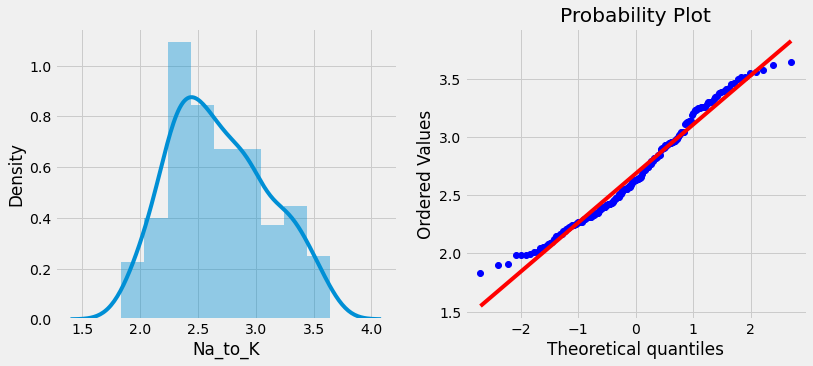

In [50]:
from scipy import stats 
transformationPlot(np.log(df['Na_to_K']))

# Handling Categorical Values

In [51]:
 # Replacing low, normal & high with 0, 1 & 2...

In [52]:
df['BP'] = [0 if x=='LOW' else 1 if x=='NORMAL' else 2 for x in df['BP']]

In [53]:
# Replacing normal and high cholesterol with 0 & 1

In [54]:
df['Cholesterol'] = [0 if x=='NORMAL' else 1 for x in df['Cholesterol']]

In [55]:
# Replacing female and male with 0 & 1

In [56]:
df['Sex'] = [0 if x=='f' else 1 for x in df['Sex']]

# Splitting Data Into Train And Test

In [57]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [60]:
print('Shape of x_train {} '. format(x_train.shape))
print('Shape of y_train {} '. format(y_train.shape))
print('Shape of x_train {} '. format(x_train.shape))
print('Shape of y_train {} '. format(y_train.shape))

Shape of x_train (160, 6) 
Shape of y_train (160,) 
Shape of x_train (160, 6) 
Shape of y_train (160,) 


# Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

# Random Forest Model

In [63]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('classification report')
    print(classification_report(y_test,yPred))

# KNN Model

In [64]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('classification report')
    print(classification_report(y_test,yPred))

# Xgboost Model

In [65]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoosringClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('classification report')
    print(classification_report(y_test,yPred))

# Compare The Model

In [66]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('_'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('_'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('_'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('_'*100)

In [67]:
compareModel(x_train,x_test,y_train,y_test)

***DecisionTreeClassifier***
confusion matrix
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Classification report
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

____________________________________________________________________________________________________
***RandomForestClassifier***
confusion matrix
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
classification report
              precision    recall  f1-score   support

       DrugY       1.00      1.00    

In [68]:
# Decision tree and random forest performs well

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
# Random forest model is selected 

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [72]:
f1_score(yPred,y_test,average='weighted')

1.0

In [73]:
cv = cross_val_score(rf,x,y,cv=5)

In [74]:
np.mean(cv)

0.975

In [75]:
pickle.dump(rf,open('model.pk1','wb'))

In [76]:
!pip install ibm_watson_machine_learning

In [77]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
               
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"GIhuAqI-RYYM8pQWbVwXbNO0Zl_wwMdcaIWSkQc7zx-d"
    
                  }
client =APIClient(wml_credentials)

In [78]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [79]:
space_uid = guid_from_space_name(client, "models")
print("space UID = "+space_uid)

space UID = de3e73f0-6c08-42b7-bac7-87392f88edc3


In [80]:
client.set.default_space(space_uid)

'SUCCESS'

In [81]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [82]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [83]:
 model_details = client.repository.store_model(model= lr ,meta_props ={
    client.repository.ModelMetaNames.NAME:"cereal_analysis",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid }
                                                )
model_id = client.repository.get_model_uid(model_details)

NameError: name 'lr' is not defined